<a href="https://colab.research.google.com/github/SowndaryaPalanisamy/Blog/blob/master/Stock_priceML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [3]:
df=pd.read_csv('NSE-TATA.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


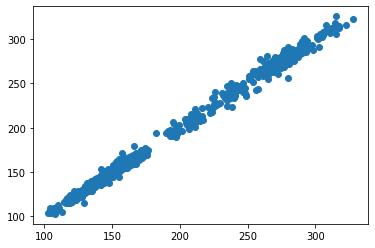

In [4]:
df.info()
df['Close'].corr(df['Open'])
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
plt.scatter(x=df["Open"], y=df["Close"])
df["Close"].describe()
df.drop(columns=['Date']).corr()

Covariance matrix 
[[1.00081037 0.99976602 0.99958511 0.99847021 0.9985123  0.36780052
  0.58750172]
 [0.99976602 1.00081037 0.99953698 0.99993938 0.99996891 0.38911337
  0.60639799]
 [0.99958511 0.99953698 1.00081037 0.99981759 0.99987438 0.36198793
  0.58291829]
 [0.99847021 0.99993938 0.99981759 1.00081037 1.00077317 0.38157763
  0.60006057]
 [0.9985123  0.99996891 0.99987438 1.00077317 1.00081037 0.38110921
  0.59964032]
 [0.36780052 0.38911337 0.36198793 0.38157763 0.38110921 1.00081037
  0.9427391 ]
 [0.58750172 0.60639799 0.58291829 0.60006057 0.59964032 0.9427391
  1.00081037]]
Eigenvectors 
[[-4.11627808e-01 -1.75469279e-01 -5.21732051e-02 -7.37431514e-01
   5.01946867e-01 -3.32960738e-02 -1.36569717e-02]
 [-4.13739861e-01 -1.55820369e-01 -4.05410915e-02 -1.76824923e-01
  -6.70235149e-01  4.41106409e-02 -5.66098757e-01]
 [-4.11321522e-01 -1.80983296e-01 -4.25967857e-02  3.06881885e-04
  -3.79844826e-01  4.17498567e-02  8.06362158e-01]
 [-4.13071124e-01 -1.62707064e-01 -3.46521

Text(30.375, 0.5, 'Cumulative explained variance')

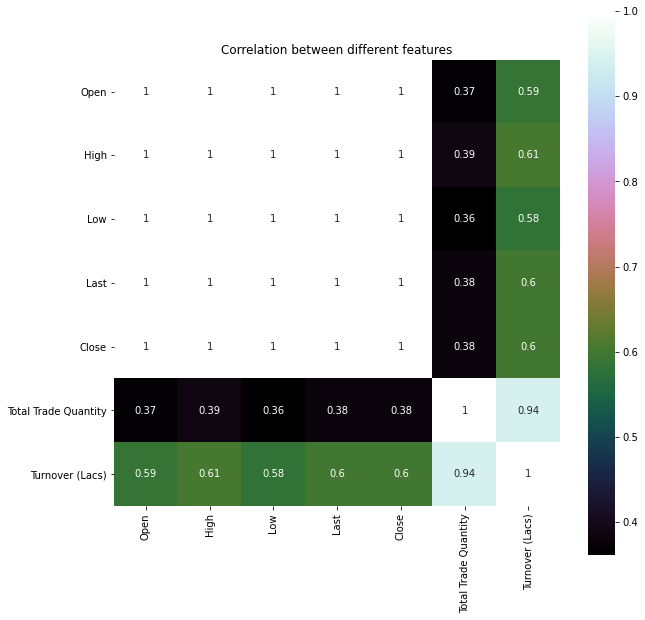

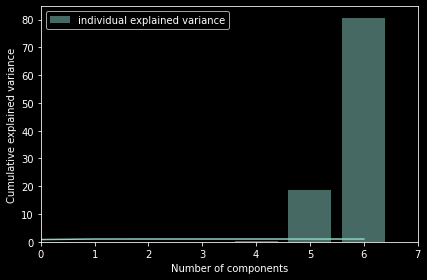

In [5]:
cols = df.columns.tolist()
cols
X = df.iloc[:,1:8].values
y = df.iloc[:,0].values
#X
#y
#np.shape(y)
np.shape(X)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
correlation = df.drop(columns=['Date']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

    tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=False)]
print('Eigenvalues:')
var_exp

with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    
    #plt.plot(range(0, 10))


    plt.bar(range(7), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

    matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Y = X_std.dot(matrix_w)
Y

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



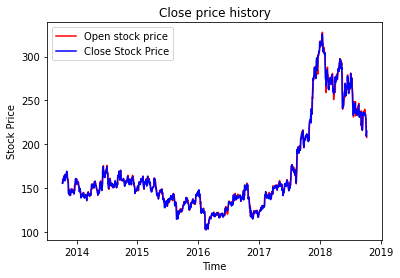

232/232 - 24s - loss: 0.0035


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Metrics for Epoch 1
Mean Absolute Error (MAE): 15.625202
Mean Square Error (MSE): 382.406223
Root Mean Square Error (RMSE): 19.555210
R square (R^2): 0.529256


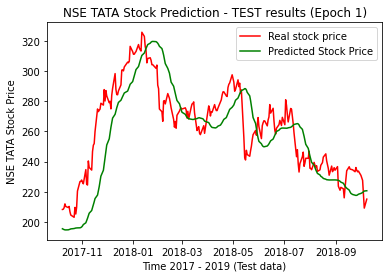

In [6]:
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']

plt.figure()
# plt.plot(df[["Open","Close"]],label='Close Price history')

plt.plot(df['Open'], color = 'red', label = 'Open stock price')
plt.plot(df['Close'], color = 'blue', label = 'Close Stock Price')
plt.title('Close price history')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

    new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=4,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price

print('Metrics for Epoch 1')
#mae = mean_absolute_error(valid_data['Close'], valid_data['Predictions'])
mae = mean_absolute_error(valid_data['Close'], valid_data['Predictions'])
print('Mean Absolute Error (MAE): %f' % mae)

mse = mean_squared_error(valid_data['Close'], valid_data['Predictions'])
print('Mean Square Error (MSE): %f' % mse)

rmse = sqrt(mse)
print('Root Mean Square Error (RMSE): %f' % rmse)

r2 = r2_score(valid_data['Close'], valid_data['Predictions'])
print('R square (R^2): %f' % r2)

lstm_model.save("saved_lstm_model.h5")

#train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
#plt.plot(train_data["Close"])
#plt.plot(valid_data[['Close',"Predictions"]])


plt.plot(valid_data['Close'], color = 'red', label = 'Real stock price')
plt.plot(valid_data['Predictions'], color = 'green', label = 'Predicted Stock Price')
plt.title('NSE TATA Stock Prediction - TEST results (Epoch 1)')
plt.xlabel('Time 2017 - 2019 (Test data)')
plt.ylabel('NSE TATA Stock Price')
plt.legend()
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


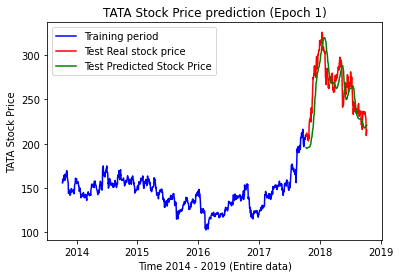

In [7]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"], color = 'blue', label = 'Training period')
#plt.plot(valid_data[['Close',"Predictions"]], color = ['red',"green"], label = ['Testing period real value', 'Test Prediction value'])
plt.plot(valid_data['Close'], color = 'red', label = 'Test Real stock price')
plt.plot(valid_data['Predictions'], color = 'green', label = 'Test Predicted Stock Price')
plt.title('TATA Stock Price prediction (Epoch 1)')
plt.xlabel('Time 2014 - 2019 (Entire data)')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()